In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import galsim

In [3]:
psf=galsim.Moffat(beta=2.5,fwhm = 0.9)
pix=galsim.Pixel(scale=1.)
invpix=galsim.Deconvolve(pix)
psfopix = galsim.Convolve([psf,invpix])

In [4]:
def makekpsf(psf,dtypes='complex64'):
  psf_complex = tf.cast(psf, dtype=dtypes)
  psf_fft = tf.signal.fft2d(psf_complex)
  psf_fft_abs = tf.abs(psf_fft)
  psf_fft_abs_complex = tf.cast(psf_fft_abs,dtype=dtypes)
  kpsf = tf.signal.fftshift(psf_fft_abs_complex,axes=[1,2])
  return kpsf

def makekimg(img,dtypes='complex64'):
  im_shift = tf.signal.ifftshift(img,axes=[1,2]) # The ifftshift is to remove the phase for centered objects
  im_complex = tf.cast(im_shift, dtypes)
  im_fft = tf.signal.fft2d(im_complex)
  imk = tf.signal.fftshift(im_fft, axes=[1,2])#the fftshift is to put the 0 frequency at the center of the k image
  return imk

def invFFT(img):
  img = tf.convert_to_tensor(img,dtype=tf.complex64)
  im_reconv = tf.signal.ifft2d(tf.signal.ifftshift(img))
  img = tf.math.real(tf.signal.fftshift(im_reconv))
  return img

## What GalSim does?

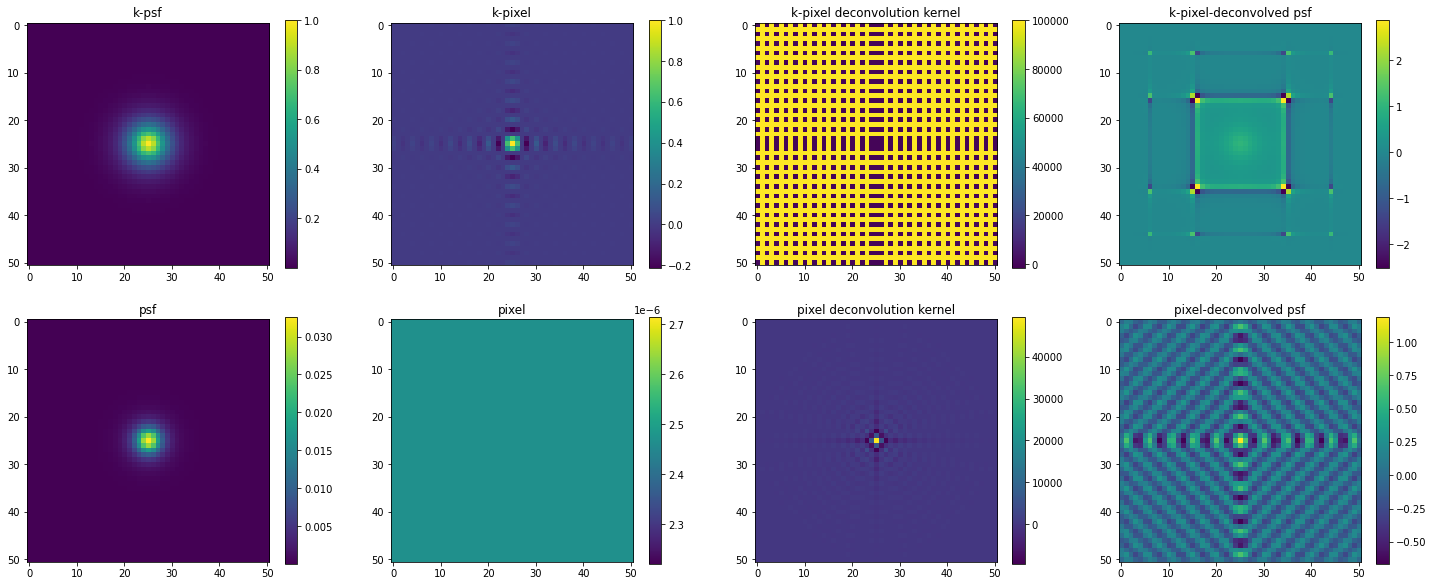

In [5]:
figure(figsize=(25,10))

subplot(241)
psfimk = psf.drawKImage(nx=51,ny=51).array
imshow(real(psfimk));colorbar();title('k-psf')

subplot(242)
piximk = pix.drawKImage(nx=51,ny=51).array
imshow(real(piximk));colorbar();title('k-pixel')

subplot(243)
invpiximk = invpix.drawKImage(nx=51,ny=51).array
imshow(real(invpiximk));colorbar();title('k-pixel deconvolution kernel')

subplot(244)
psfopiximk=psfopix.drawKImage(nx=51,ny=51).array
imshow(real(psfopiximk));colorbar();title('k-pixel-deconvolved psf')
savefig('deconvolve_in_k_space.jpg')

subplot(245)
psfim = psf.drawImage(nx=51,ny=51).array
imshow(real(psfim));colorbar();title('psf')

subplot(246)
pixim = pix.drawImage(nx=51,ny=51).array
imshow(real(pixim));colorbar();title('pixel')

subplot(247)
invpixim = invpix.drawImage(nx=51,ny=51).array
imshow(real(invpixim));colorbar();title('pixel deconvolution kernel')

subplot(248)
psfopixim=psfopix.drawImage(nx=51,ny=51).array
imshow(real(psfopixim));colorbar();title('pixel-deconvolved psf')
savefig('deconvolve_pixel.jpg')

In [73]:
def makekimg(img,padsize=1,dtypes='complex64'):
  img = tf.convert_to_tensor(img,dtype=dtypes)
  paddings = tf.constant([[0,0],[padsize, padsize], [padsize, padsize]])
  img = tf.pad(img,paddings)
  
  im_shift = tf.signal.ifftshift(img,axes=[1,2]) # The ifftshift is to remove the phase for centered objects
  im_fft = tf.signal.fft2d(im_shift)
  imk = tf.signal.fftshift(im_fft, axes=[1,2])#the fftshift is to put the 0 frequency at the center of the k image
  return imk

In [112]:
def pade(img,padsize=1,dtypes='complex64'):
  img = tf.convert_to_tensor(img,dtype=dtypes)
  paddings = tf.constant([[0,0],[padsize, padsize], [padsize, padsize]])
  img = tf.pad(img,paddings)
  return(img)
  

In [117]:
teste =real(pade(psfim[tf.newaxis],51)[0])

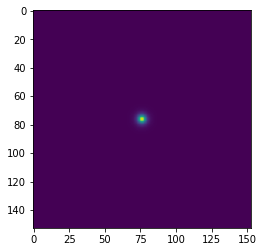

In [118]:
imshow(teste)

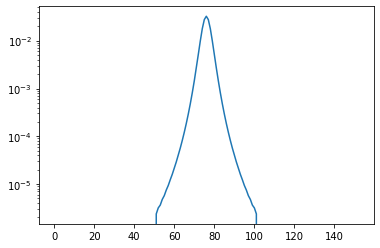

In [120]:
plot(teste[:,153//2])
yscale('log')

In [110]:
psfk=makekimg(psfim[tf.newaxis],51)*360
#psfk=trim(psfk,padsize=51)

/local/home/az264973/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/local/home/az264973/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


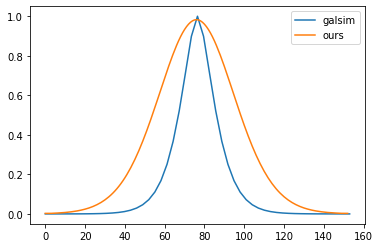

In [111]:
plot(linspace(0,3*51,51),psfimk[:,25],label='galsim')
plot(psfk[0][:,25],label='ours')
legend()

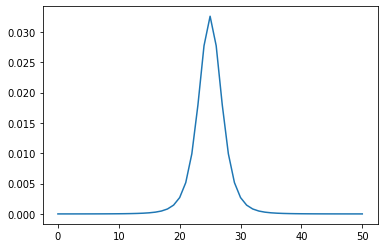

In [9]:
plot(real(psfk[0,...])[:,25])

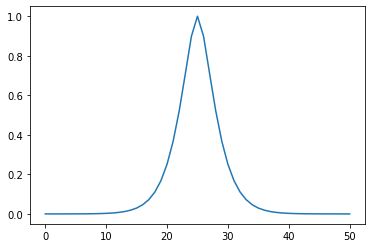

In [10]:

plot(real(psfimk[:,25]))

In [11]:
def trim(img,padsize=1):
  img = img[:,padsize:-padsize,padsize:-padsize,...]
  return img
  
  

In [12]:
trim(psfim[tf.newaxis],1)[0].shape

(49, 49)

In [13]:
nx = tf.range(25,51)
ny = tf.range(51)

TypeError: Image data of dtype object cannot be converted to float

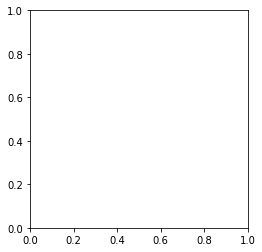

In [14]:
imshow(trim)